In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

C:\Users\B Vasundhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

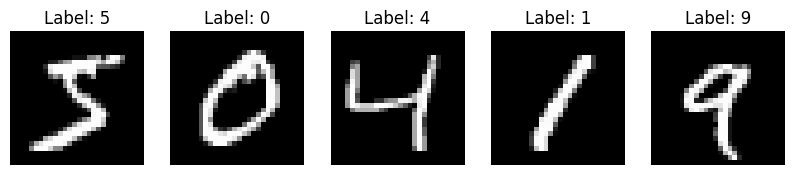

In [3]:
# Visualize some samples
def plot_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_samples(x_train, y_train)

In [4]:
# Define the LeNet model with dropout
def create_lenet_with_dropout_model():
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dropout(0.5),  # Dropout layer
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [5]:
# Compile and train the model
model = create_lenet_with_dropout_model()
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 8s 9ms/step - loss: 0.4279 - accuracy: 0.8623 - val_loss: 0.0983 - val_accuracy: 0.9706
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1435 - accuracy: 0.9572 - val_loss: 0.0718 - val_accuracy: 0.9789
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1050 - accuracy: 0.9683 - val_loss: 0.0627 - val_accuracy: 0.9813
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0873 - accuracy: 0.9727 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.0529 - val_accuracy: 0.9847
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.0553 - val_accuracy: 0.9855
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0477 - val_accuracy: 0.9865
Epoch 

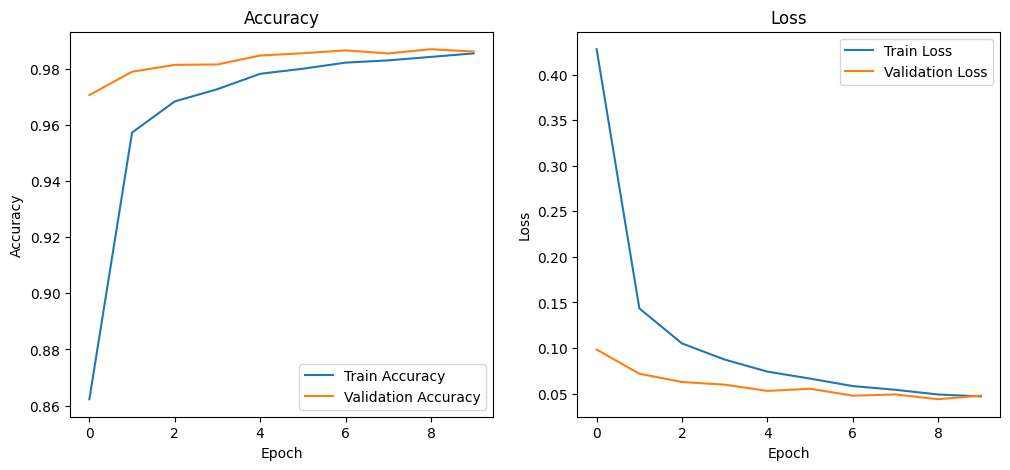

In [6]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9888
Test accuracy: 0.9887999892234802
Test loss: 0.03544348105788231


In [8]:
# Generate confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


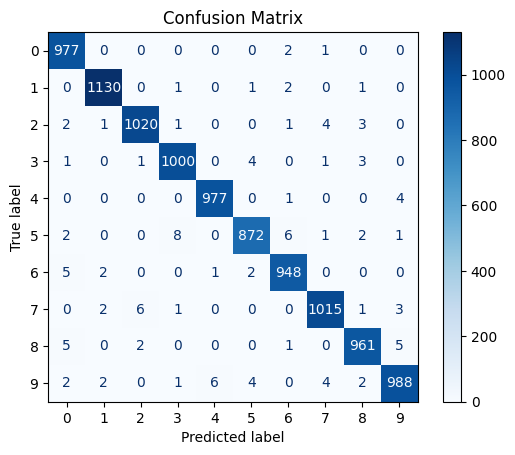

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()